### Results for data transfer benchmarking for MGHP OSN using Pangeo cloud 

- Need to add timestamps on tests
- run more tests with different chunks, compute env
- `gcs_zarr_test-4_us_central.csv` and `gcs_zarr_test-5_us_central.csv` are updated correct files

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#'OSN shrunk llcreader US Central' : ['osn_shrunk_s3_llcreader_test-2_us_central.csv']

files = {'OSN Zarr US Central': ['osn_zarr_test-4_us_central.csv', 'osn_zarr_test-5_us_central.csv'],
         #'OSN Zarr US West': ['osn_zarr_test-4_us_west.csv', 'osn_zarr_test-5_us_west.csv'],
         'GCS Zarr US Central' : ['gcs_zarr_test-4_us_central.csv', 'gcs_zarr_test-5_us_central.csv']
        }

data = {}
for name, fnames in files.items():
    data[name] = pd.concat([pd.read_csv(f'{fname}') for fname in fnames])

In [3]:
data['OSN Zarr US Central']

,Unnamed: 0,nthreads,ncores,nworkers,nbytes,chunksize,cloud,format,runtime,throughput_MBps,throughput_MBps_per_thread
0,0,40,40,20,674085888000,74649600,osn,zarr,38.838005,17356.346879,433.908672
1,1,50,50,25,674085888000,74649600,osn,zarr,48.457178,13910.960512,278.219210
2,2,60,60,30,674085888000,74649600,osn,zarr,39.618269,17014.521369,283.575356
3,3,70,70,35,674085888000,74649600,osn,zarr,42.710864,15782.539237,225.464846
4,4,80,80,40,674085888000,74649600,osn,zarr,44.200974,15250.475887,190.630949
5,5,90,90,45,674085888000,74649600,osn,zarr,43.015228,15670.866315,174.120737
6,6,100,100,50,674085888000,74649600,osn,zarr,44.507739,15145.363691,151.453637
7,7,110,110,55,674085888000,74649600,osn,zarr,39.651896,17000.092100,154.546292
8,8,120,120,60,674085888000,74649600,osn,zarr,38.134207,17676.672380,147.305603
9,9,140,140,70,674085888000,74649600,osn,zarr,39.548670,17044.464024,121.746172


/datascope/hainegroup/asiddi24/miniconda3/envs/ecco/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


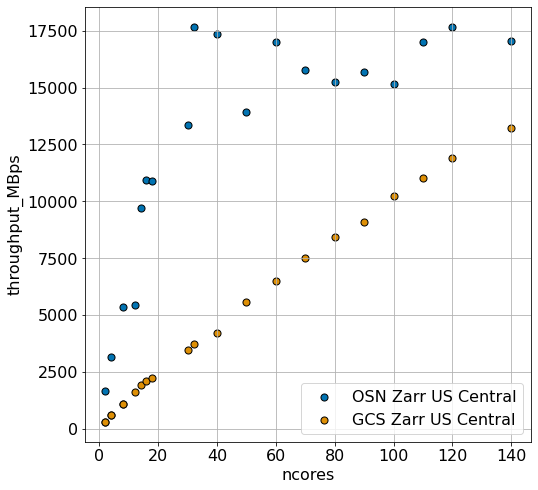

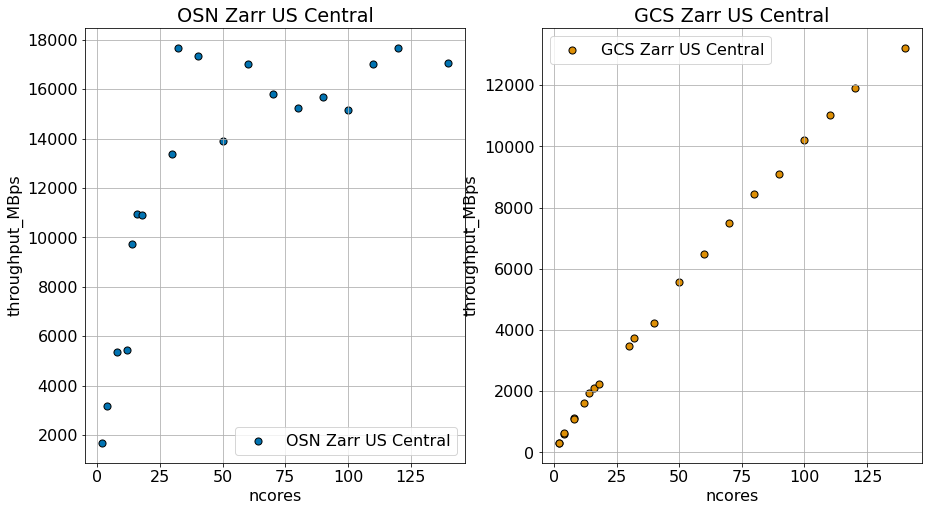

In [10]:
plt.rcParams.update({'font.size': 16})

fig0, ax0 = plt.subplots(figsize=(8,8))
fig1, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 8))
palette = sns.color_palette('colorblind', len(files))

for (name, df), color, ax1 in zip(data.items(), palette, axs.flat):
    for ax in [ax0, ax1]:
        df.plot(kind='scatter', x='ncores', y='throughput_MBps',
                  s=50, c=[color], edgecolor='k', ax=ax, label=name)
    ax1.grid()
    ax1.set_title(name)
    ax1.tick_params(labelsize=16)
    ax1.legend(loc='best')


ax0.grid()
ax0.legend(loc='best')
ax0.tick_params(labelsize=16)

fig0.savefig('OSN_GCS_comparison_single_test_corrected.png', format='png', bbox_inches='tight', facecolor='white', dpi=300)
fig1.savefig('OSN_GCS_single_test_plots_corrected.png', format='png', bbox_inches='tight',facecolor='white', dpi=300)


fig0.tight_layout()
#fig1.tight_layout()
